In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
X = (6*np.random.random(100) - 4).reshape(-1,1)
y = X**2 + (6*np.random.random(100)).reshape(-1,1)

In [88]:
X.shape, y.shape

((100, 1), (100, 1))

<Axes: >

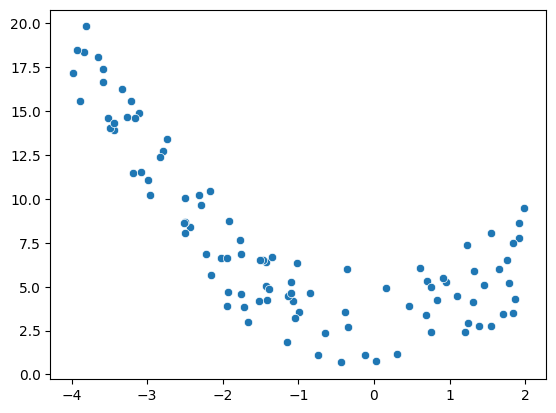

In [89]:
sns.scatterplot(x=X.ravel(), y=y.ravel())

# Trying out each model individually

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=3)
rfr = RandomForestRegressor()

estimators = [('lr', lr), ('dt', dt), ('rfr', rfr)]

from sklearn.model_selection import cross_val_score

for estimator in estimators:
    cv_score = np.mean(cross_val_score(estimator[1], X, y.ravel(), scoring='r2', cv=10))
    print(f'{estimator[0]} : {cv_score}')

lr : 0.27746397262593653
dt : 0.7593693512414197
rfr : 0.7415197631632673


/home/ree/python_venv/ML/lib64/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


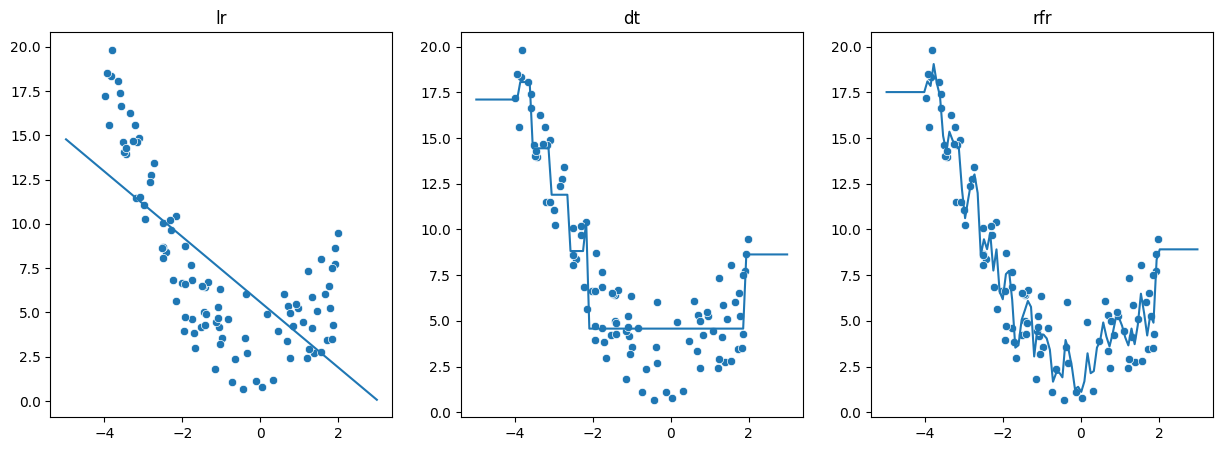

In [105]:
X_plot = np.linspace(min(X)-1, max(X)+1, 100)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i in range(len(estimators)):
    model = estimators[i][1]
    model.fit(X, y)   
    y_plot = model.predict(X_plot)

    sns.lineplot(x=X_plot.ravel(), y=y_plot.ravel(), ax=ax[i]) 
    sns.scatterplot(x=X.ravel(), y=y.ravel(), ax=ax[i])
    ax[i].set_title(estimators[i][0])

# Using Voting Ensemble Classifier

In [107]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor(estimators=estimators)
print(np.mean(cross_val_score(vr, X, y.ravel(), scoring='r2', cv=10)))

0.7246678098585467


In [112]:
vr.fit(X, y.ravel())    # without fitting before we cannot access the parameters
vr.estimators_   

[LinearRegression(),
 DecisionTreeRegressor(max_depth=3),
 RandomForestRegressor()]

/home/ree/python_venv/ML/lib64/python3.12/site-packages/sklearn/ensemble/_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Voting Ensemble Model')

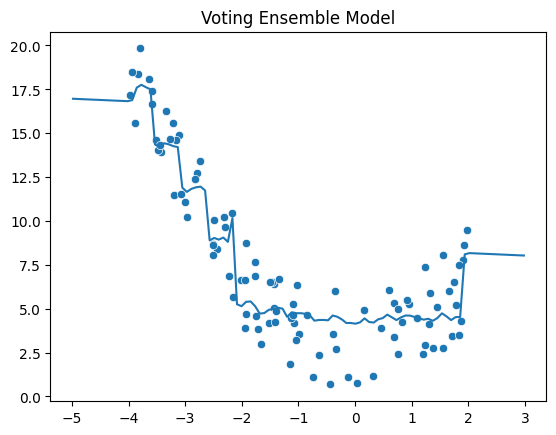

In [137]:
vr.fit(X, y)   
y_plot = vr.predict(X_plot)

sns.lineplot(x=X_plot.ravel(), y=y_plot.ravel()) 
sns.scatterplot(x=X.ravel(), y=y.ravel())
plt.title('Voting Ensemble Model')

# Weighted Voting

In [128]:
max_r2_score = 0
best_weights = None

for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vr = VotingRegressor(estimators=estimators, weights=[i,j,k])
            r2_score = np.round(np.mean(cross_val_score(vr, X, y.ravel(), cv=10, scoring='r2')), 2)
            print(f'For {i},{j},{k} : {r2_score}')

            if r2_score > max_r2_score:
                max_r2_score = r2_score
                best_weights = (i,j,k)

print(f'Max R2 Score : {max_r2_score}, Weights : {best_weights}')

For 1,1,1 : 0.73
For 1,1,2 : 0.74
For 1,1,3 : 0.75
For 1,2,1 : 0.75
For 1,2,2 : 0.76
For 1,2,3 : 0.76
For 1,3,1 : 0.76
For 1,3,2 : 0.76
For 1,3,3 : 0.76
For 2,1,1 : 0.66
For 2,1,2 : 0.7
For 2,1,3 : 0.72
For 2,2,1 : 0.71
For 2,2,2 : 0.73
For 2,2,3 : 0.74
For 2,3,1 : 0.73
For 2,3,2 : 0.74
For 2,3,3 : 0.75
For 3,1,1 : 0.6
For 3,1,2 : 0.66
For 3,1,3 : 0.69
For 3,2,1 : 0.66
For 3,2,2 : 0.69
For 3,2,3 : 0.71
For 3,3,1 : 0.7
For 3,3,2 : 0.71
For 3,3,3 : 0.72
Max R2 Score : 0.76, Weights : (1, 2, 2)


#### We can see that since model 2 (dt) gives best result, having higher weight on model 2 also gives better results in the ensemble

/home/ree/python_venv/ML/lib64/python3.12/site-packages/sklearn/ensemble/_voting.py:694: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Voting Ensemble Model')

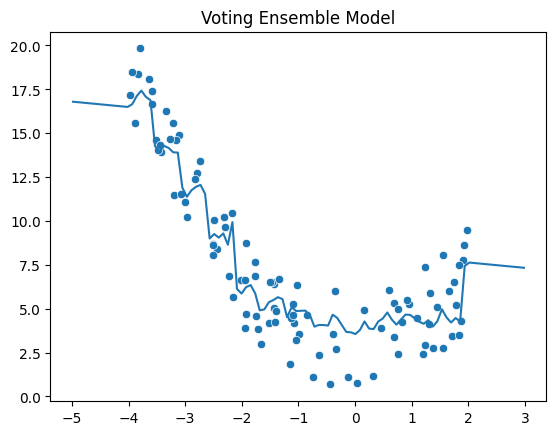

In [138]:
vr = VotingRegressor(estimators=estimators, weights=[1,3,2])
vr.fit(X, y)   
y_plot = vr.predict(X_plot)

sns.lineplot(x=X_plot.ravel(), y=y_plot.ravel()) 
sns.scatterplot(x=X.ravel(), y=y.ravel())
plt.title('Voting Ensemble Model')

# Same Algorithm with Different parameters

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def poly_regression(degree=1):
    poly = PolynomialFeatures(degree=degree)
    lr = LinearRegression()

    pipe = Pipeline(steps=[
        ('polynomial_features', poly),
        ('linear_regression', lr)
    ])

    return pipe

lr1 = poly_regression(degree=1)
lr2 = poly_regression(degree=5)
lr3 = poly_regression(degree=10)
lr4 = poly_regression(degree=20)
lr5 = poly_regression(degree=30)

estimators = [('lr1', lr1), ('lr2', lr2), ('lr3', lr3), ('lr4', lr4), ('lr5', lr5)]

for estimator in estimators:
    x = cross_val_score(estimator[1], X, y.ravel(), cv=10, scoring='r2')
    print(estimator[0], np.round(np.mean(x), 2))

lr1 0.28
lr2 0.81
lr3 0.8
lr4 0.54
lr5 0.66


In [157]:
# combining all models

vr = VotingRegressor(estimators=estimators)
print(np.mean(cross_val_score(vr, X, y.ravel(), cv=10, scoring='r2')))

0.7831170721559102


#### Accha so not always better score

In [159]:
dt1 = DecisionTreeRegressor(max_depth=1)
dt2 = DecisionTreeRegressor(max_depth=3)
dt3 = DecisionTreeRegressor(max_depth=5)
dt4 = DecisionTreeRegressor(max_depth=7)
dt5 = DecisionTreeRegressor(max_depth=None)

estimators = [('dt1',dt1),('dt2',dt2),('dt3',dt3),('dt4',dt4),('dt5',dt5)]

for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y.ravel(),scoring='r2',cv=10)
  print(estimator[0],np.round(np.mean(scores),2))

vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y.ravel(),scoring='r2',cv=10)
print("Voting Regressor",np.round(np.mean(scores),2))

dt1 0.59
dt2 0.76
dt3 0.77
dt4 0.73
dt5 0.62
Voting Regressor 0.76
